# Encoder-Decoder-CNN

# A simple synthetic data

In [4]:
import math
from matplotlib import pyplot as plt
import numpy as np
import random

def get_sin_wave(noise = 0.05, points = 1000):
    
    sin_wave = []
    c = 0.1
    for i in range(points):
        n = random.random()*noise
        sin_wave.append(c*i+10*math.sin(i*0.5+n)+3*math.sin(i*0.1))
    
    sin_wave = np.array(sin_wave)
    
    return sin_wave

In [5]:
seq_len = 20

def get_Data(sin_wave):
    X = []
    Y = []
    num_records = len(sin_wave) - seq_len

    for i in range(num_records):
        X.append(sin_wave[i:i+seq_len])
        Y.append(sin_wave[i+seq_len])

    X = np.array(X)
    X = np.expand_dims(X, axis=2)

    Y = np.array(Y)
    Y = np.expand_dims(Y, axis=1)
    
    return X,Y

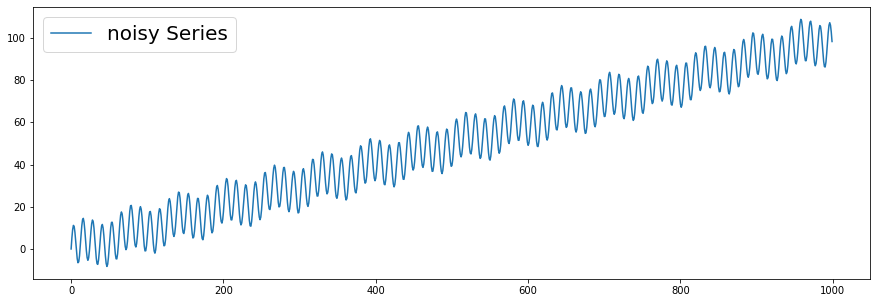

(980, 20, 1) (980, 1)


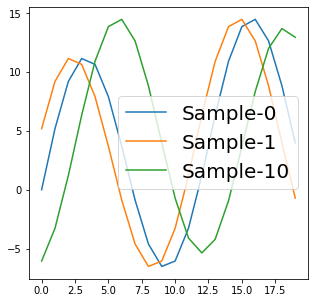

In [6]:
# Training Data

sin_wave = get_sin_wave(noise=0.0)
plt.figure(figsize=(15, 5))
plt.plot(sin_wave, label='noisy Series')
plt.legend(fontsize=20)
plt.show()

X,Y = get_Data(sin_wave)
print(X.shape, Y.shape)

plt.figure(figsize=(5, 5))
plt.plot(X[0][:,0], label='Sample-0')
plt.plot(X[1][:,0], label='Sample-1')
plt.plot(X[10][:,0], label='Sample-10')
plt.legend(fontsize=20)
plt.show()

# Encoder-decoder-CNN

In [30]:
# 1D-CNN
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.Input((X.shape[1], X.shape[2])))

model.add(tf.keras.layers.Conv1D(16, 3, activation='relu'))
model.add(tf.keras.layers.Conv1D(16, 3, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(20, activation='relu'))

#Now we do decoder
model.add(tf.keras.layers.Reshape((5,4)))
model.add(tf.keras.layers.UpSampling1D(4))
model.add(tf.keras.layers.Conv1D(16, 3, activation='relu', padding='same'))
model.add(tf.keras.layers.Conv1D(16, 3, activation='relu', padding='same'))
#model.add(tf.keras.layers.UpSampling1D(2))
model.add(tf.keras.layers.Conv1D(1, 1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.MeanSquaredError())


model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 18, 16)            64        
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 16, 16)            784       
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                5140      
_________________________________________________________________
reshape_3 (Reshape)          (None, 5, 4)              0         
_________________________________________________________________
up_sampling1d_5 (UpSampling1 (None, 20, 4)             0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 20, 16)           

In [47]:
model.fit(X, X, batch_size=64, epochs=300,verbose=1)

Epoch 1/300
980/980 [==============================] - 0s 75us/sample - loss: 0.6302
Epoch 2/300
980/980 [==============================] - 0s 76us/sample - loss: 1.2704
Epoch 3/300
980/980 [==============================] - 0s 71us/sample - loss: 1.0216
Epoch 4/300
980/980 [==============================] - 0s 70us/sample - loss: 0.8782
Epoch 5/300
980/980 [==============================] - 0s 67us/sample - loss: 0.3011
Epoch 6/300
980/980 [==============================] - 0s 56us/sample - loss: 0.1920
Epoch 7/300
980/980 [==============================] - 0s 63us/sample - loss: 0.1680
Epoch 8/300
980/980 [==============================] - 0s 56us/sample - loss: 0.1456
Epoch 9/300
980/980 [==============================] - 0s 65us/sample - loss: 0.1565
Epoch 10/300
980/980 [==============================] - 0s 70us/sample - loss: 0.1418
Epoch 11/300
980/980 [==============================] - 0s 72us/sample - loss: 0.1353
Epoch 12/300
980/980 [==============================] - 0s 67us

980/980 [==============================] - 0s 102us/sample - loss: 0.2690
Epoch 97/300
980/980 [==============================] - 0s 83us/sample - loss: 0.1098
Epoch 98/300
980/980 [==============================] - 0s 77us/sample - loss: 0.0985
Epoch 99/300
980/980 [==============================] - 0s 87us/sample - loss: 0.0965
Epoch 100/300
980/980 [==============================] - 0s 95us/sample - loss: 0.1135
Epoch 101/300
980/980 [==============================] - 0s 66us/sample - loss: 0.1412
Epoch 102/300
980/980 [==============================] - 0s 74us/sample - loss: 0.2345
Epoch 103/300
980/980 [==============================] - 0s 57us/sample - loss: 0.2172
Epoch 104/300
980/980 [==============================] - 0s 62us/sample - loss: 0.2960
Epoch 105/300
980/980 [==============================] - 0s 75us/sample - loss: 0.3972
Epoch 106/300
980/980 [==============================] - 0s 75us/sample - loss: 0.1598
Epoch 107/300
980/980 [==============================] - 0s

980/980 [==============================] - 0s 77us/sample - loss: 0.0703
Epoch 191/300
980/980 [==============================] - 0s 74us/sample - loss: 0.0731
Epoch 192/300
980/980 [==============================] - 0s 70us/sample - loss: 0.0698
Epoch 193/300
980/980 [==============================] - 0s 64us/sample - loss: 0.0689
Epoch 194/300
980/980 [==============================] - 0s 61us/sample - loss: 0.0719
Epoch 195/300
980/980 [==============================] - 0s 73us/sample - loss: 0.0690
Epoch 196/300
980/980 [==============================] - 0s 79us/sample - loss: 0.0734
Epoch 197/300
980/980 [==============================] - 0s 63us/sample - loss: 0.0713
Epoch 198/300
980/980 [==============================] - 0s 63us/sample - loss: 0.1363
Epoch 199/300
980/980 [==============================] - 0s 65us/sample - loss: 0.2925
Epoch 200/300
980/980 [==============================] - 0s 64us/sample - loss: 0.1922
Epoch 201/300
980/980 [==============================] - 

980/980 [==============================] - 0s 67us/sample - loss: 0.1430
Epoch 285/300
980/980 [==============================] - 0s 59us/sample - loss: 0.1094
Epoch 286/300
980/980 [==============================] - 0s 64us/sample - loss: 0.2127
Epoch 287/300
980/980 [==============================] - 0s 62us/sample - loss: 0.1630
Epoch 288/300
980/980 [==============================] - 0s 69us/sample - loss: 0.1078
Epoch 289/300
980/980 [==============================] - 0s 67us/sample - loss: 0.0911
Epoch 290/300
980/980 [==============================] - 0s 75us/sample - loss: 0.0764
Epoch 291/300
980/980 [==============================] - 0s 65us/sample - loss: 0.0636
Epoch 292/300
980/980 [==============================] - 0s 60us/sample - loss: 0.0946
Epoch 293/300
980/980 [==============================] - 0s 59us/sample - loss: 0.0864
Epoch 294/300
980/980 [==============================] - 0s 68us/sample - loss: 0.0708
Epoch 295/300
980/980 [==============================] - 

In [48]:
X_pred = model.predict(X)

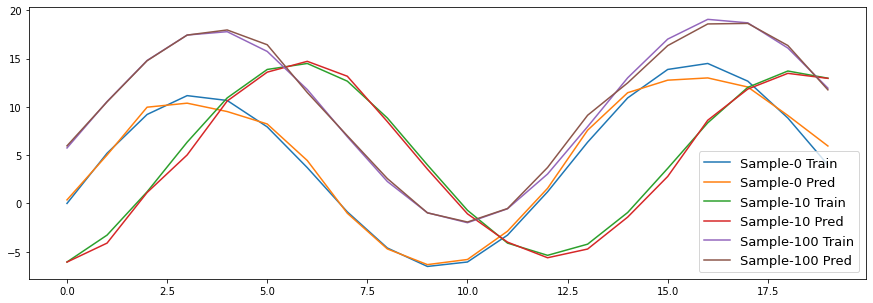

In [50]:
plt.figure(figsize=(15, 5))
plt.plot(X[0][:,0], label='Sample-0 Train')
plt.plot(X_pred[0][:,0], label='Sample-0 Pred')

plt.plot(X[10][:,0], label='Sample-10 Train')
plt.plot(X_pred[10][:,0], label='Sample-10 Pred')

plt.plot(X[100][:,0], label='Sample-100 Train')
plt.plot(X_pred[100][:,0], label='Sample-100 Pred')





plt.legend(fontsize=13)
plt.show()

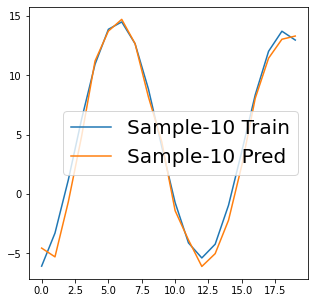

In [34]:
plt.figure(figsize=(5, 5))
plt.plot(X[10][:,0], label='Sample-10 Train')
plt.plot(X_pred[10][:,0], label='Sample-10 Pred')

plt.legend(fontsize=20)
plt.show()

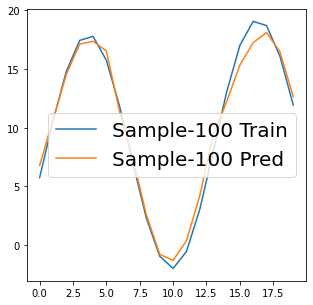

In [35]:
plt.figure(figsize=(5, 5))
plt.plot(X[100][:,0], label='Sample-100 Train')
plt.plot(X_pred[100][:,0], label='Sample-100 Pred')

plt.legend(fontsize=20)
plt.show()